# Nonlinear Dynamics and Chaos - Steven H. Strogatz - Capítulo 3

### Julian Andres Salazar Parias


In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp as solver
from scipy.optimize import root_scalar

In [3]:
def plot_vector_fields(f,critical_values,xi,xf,n,ti,tf):
  b = 0
  x = np.linspace(xi,xf,100)
  plt.figure(figsize=(int(5*len(critical_values)),10))
  p = 1
  for i in critical_values:
    plt.subplot(2,len(critical_values),p)
    p = p+1
    plt.plot(x,f(t=0,x=x,r=i,b=0))
    plt.axhline(0,color='k')
    plt.axvline(0,color='k')
    plt.grid()
    plt.title(f"$r = {i}$",fontsize=20)
    plt.xlabel("$x$",fontsize=15)
    plt.ylabel("$\dot x$",fontsize = 15)

    tspam=[ti, tf]
    t=np.linspace(ti,tf,100)
    plt.subplot(2,len(critical_values),p+len(critical_values)-1)
    for x0 in np.linspace(xi,xf,n):
      sol=solver(f,tspam,[x0],args=(i,b),t_eval=t)
      plt.plot(sol.t, sol.y[0])
      plt.ylim(-10,10)
      plt.xlabel("$t$",fontsize=15)
      plt.ylabel("$x(t)$",fontsize=15)
  plt.tight_layout()

# **3.1 SADDLE-NODE BIFURCATION**

## 3.1.2
### \begin{equation}
\dot { x } = r-cosh(x)
\end{equation}



<ipython-input-9-b1d59c69f078>:2: RuntimeWarning: overflow encountered in cosh
  return r - np.cosh(x)


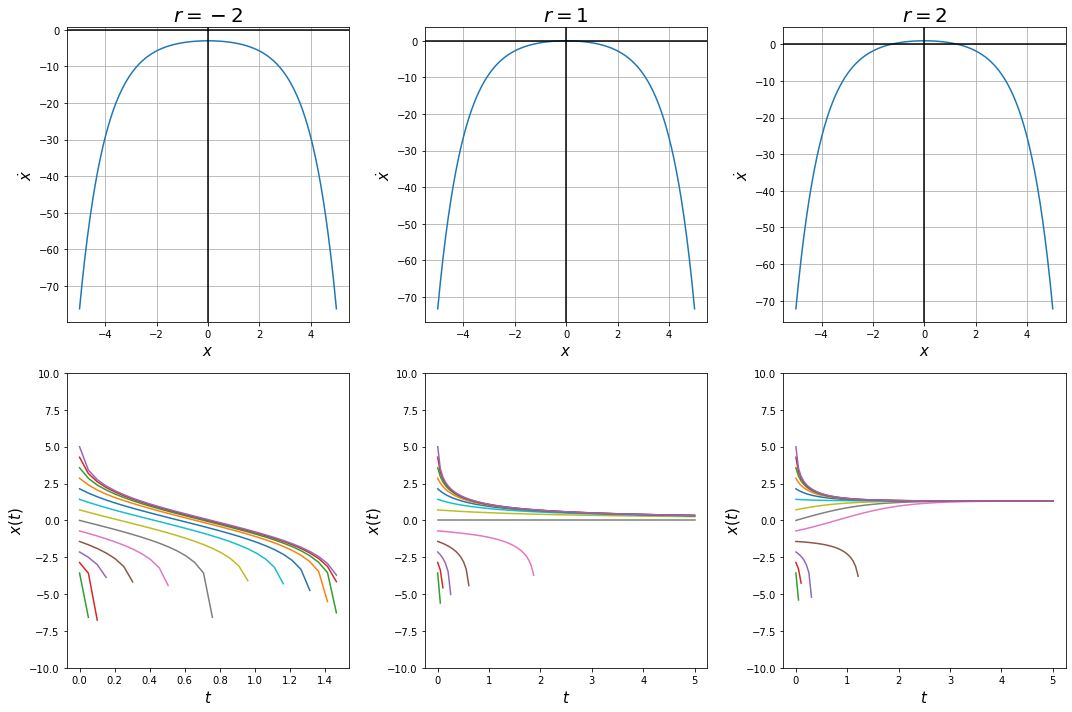

In [9]:

def f2(t,x,r,b=0):
  return r - np.cosh(x)

plot_vector_fields(f2,[-2,1,2],-5,5,15,0,5)

<ipython-input-9-b1d59c69f078>:2: RuntimeWarning: overflow encountered in cosh
  return r - np.cosh(x)


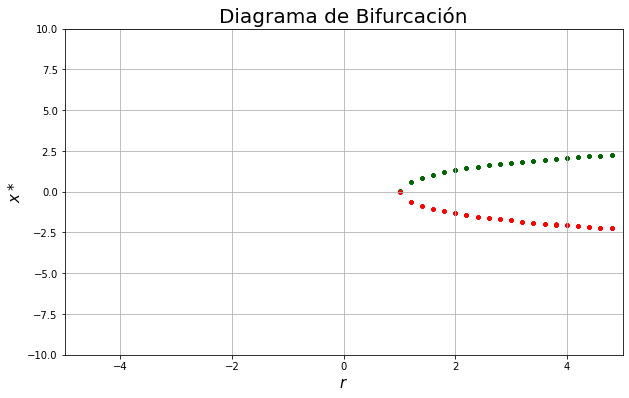

In [10]:
ti=0; tf=100; dt=100
tspam=[ti, tf]
b=0
plt.figure(figsize=(10,6))
for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solver (f2,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='darkgreen', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solver (f2,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')


plt.axis([-5, 5, -10, 10])
plt.grid()
plt.xlabel("$r$",fontsize=15)
plt.ylabel("$x*$",fontsize=15)
plt.title("Diagrama de Bifurcación",fontsize=20)

plt.show()

## 3.1.4
### \begin{equation}
\dot { x } = r + (1/2)x - x/(1+x)
\end{equation}


**Problemas en la graficacion del diagrama de bifurcacion**

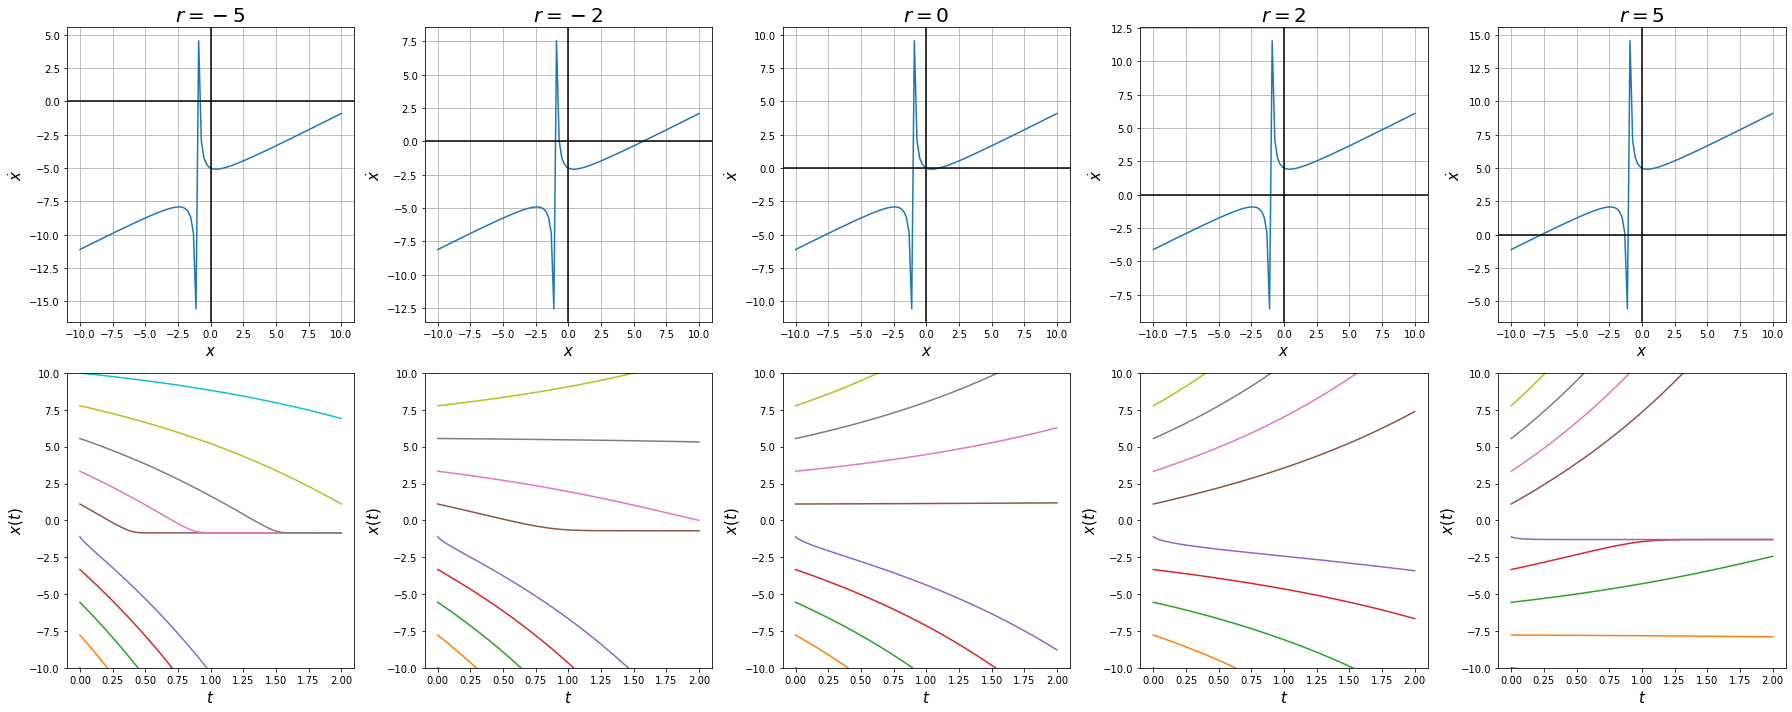

In [5]:
def f10(t,x,r,b=0):
  return r + (1/2)*x - x/(1+x)


plot_vector_fields(f10,[-5,-2,0,2,5],-10,10,10,0,2)

In [ ]:
ti=0; tf=100; dt=100
tspam=[ti, tf]
b=0
plt.figure(figsize=(10,6))
for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solver (f10,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='darkgreen', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solver (f10,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')


plt.axis([-5, 5, -10, 10])
plt.grid()
plt.xlabel("$r$",fontsize=15)
plt.ylabel("$x*$",fontsize=15)
plt.title("Diagrama de Bifurcación",fontsize=20)

plt.show()

# **3.2 TRANSCRITICAL BIFURCATION**



## 3.2.2
### \begin{equation}
\dot { x } = rx-ln(x+1)
\end{equation}



<ipython-input-13-f707535da319>:2: RuntimeWarning: invalid value encountered in log
  return r*x - np.log(x+1)


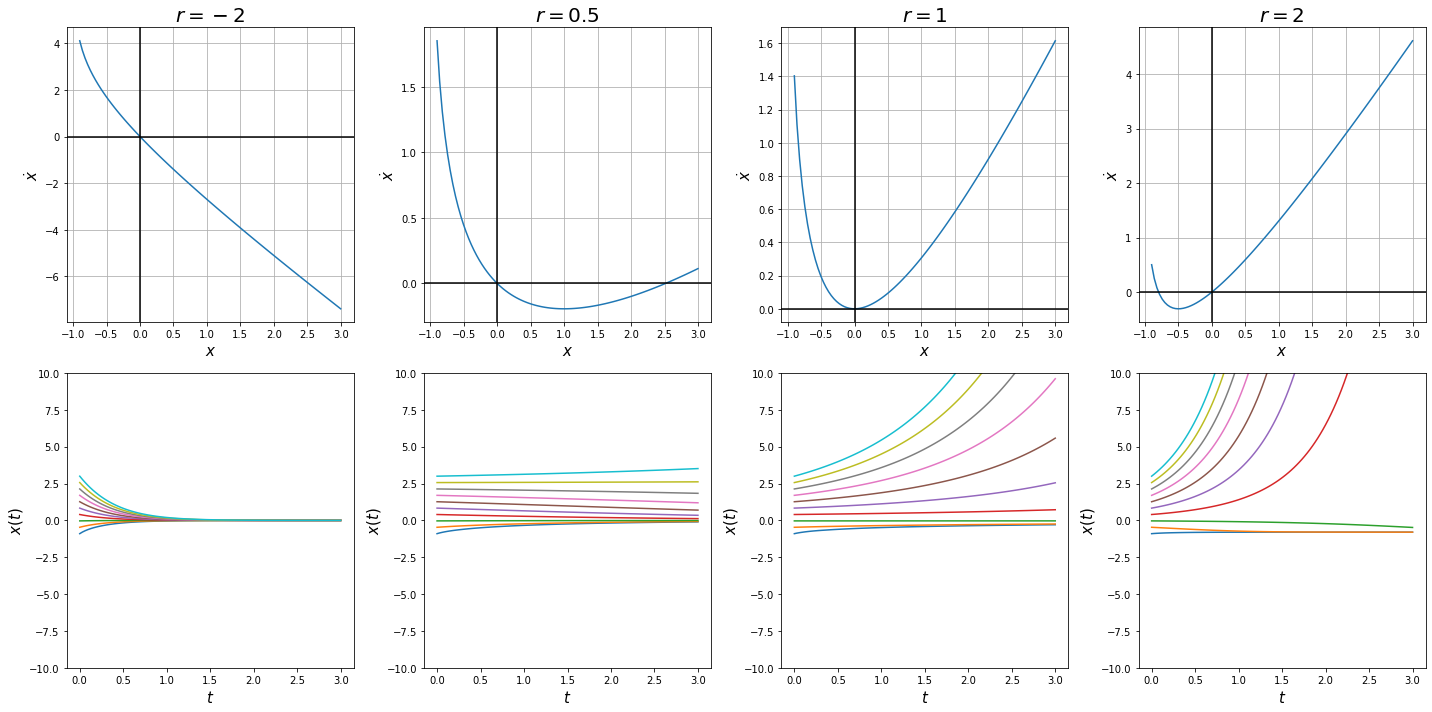

In [13]:
def f8(t,x,r,b=0):
  return r*x - np.log(x+1) 

plot_vector_fields(f8,[-2,0.5,1,2],-0.9,3,10,0,3)

<ipython-input-13-f707535da319>:2: RuntimeWarning: invalid value encountered in log
  return r*x - np.log(x+1)
<ipython-input-13-f707535da319>:2: RuntimeWarning: divide by zero encountered in log
  return r*x - np.log(x+1)
<ipython-input-13-f707535da319>:2: RuntimeWarning: invalid value encountered in subtract
  return r*x - np.log(x+1)


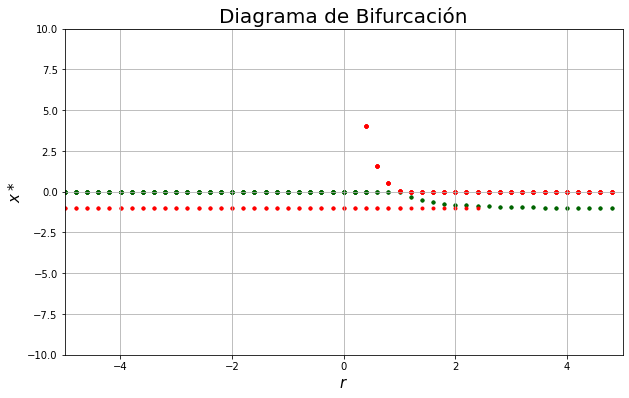

In [14]:
ti=0; tf=50; dt=100
tspam=[ti, tf]
b=0
plt.figure(figsize=(10,6))
for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-0.9,5,0.7):
    sol=solver(f8,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='darkgreen', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-0.9,5,0.7):
    sol=solver(f8,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')


plt.axis([-5, 5, -10, 10])
plt.grid()
plt.xlabel("$r$",fontsize=15)
plt.ylabel("$x*$",fontsize=15)
plt.title("Diagrama de Bifurcación",fontsize=20)
plt.show()

## 3.2.4
### \begin{equation}
\dot { x } = x(r-e^x)
\end{equation}



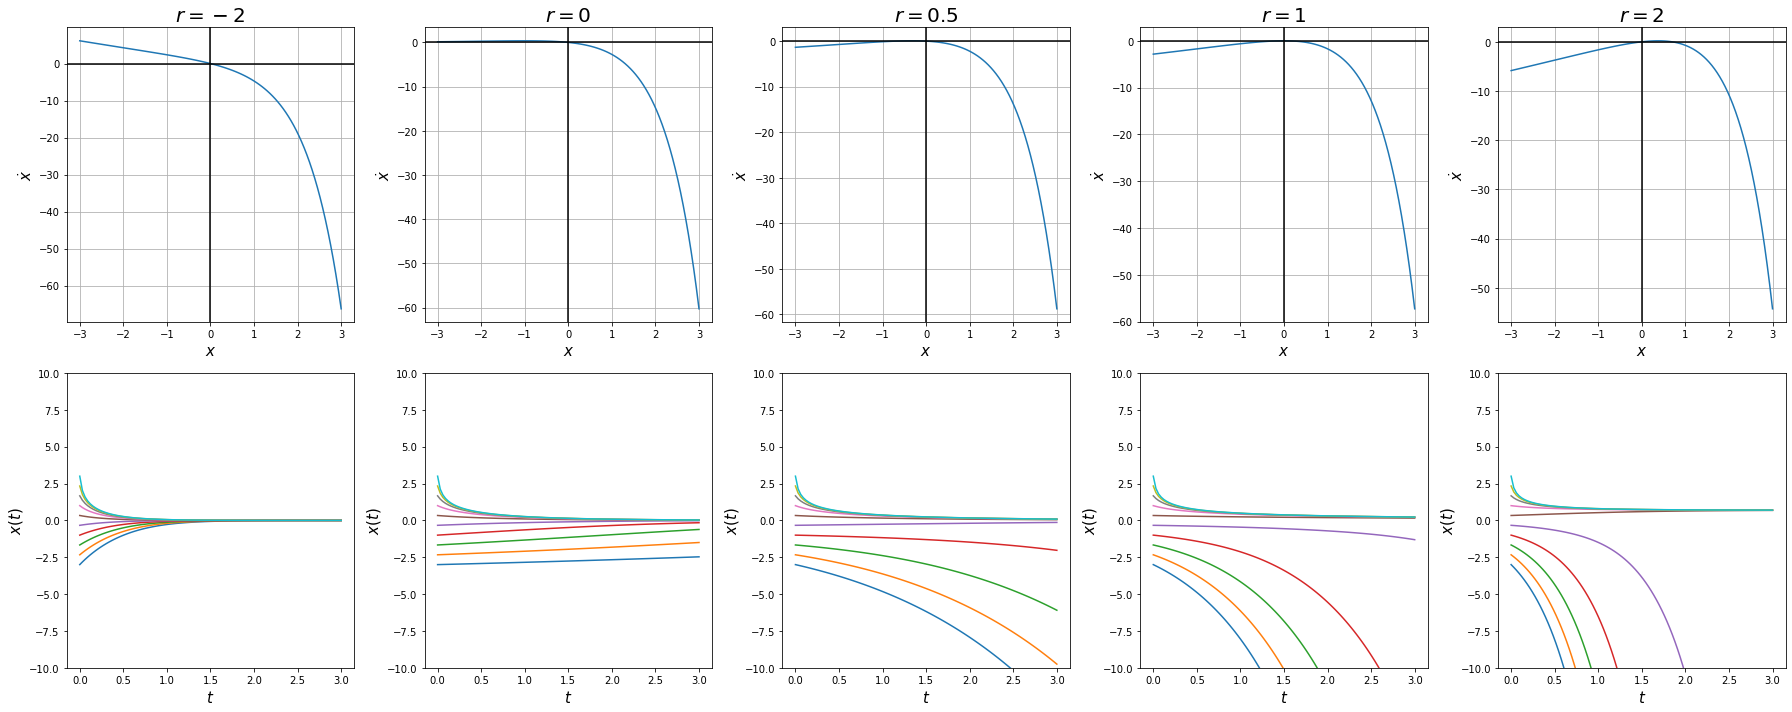

In [13]:
def f4(t,x,r,b=0):
  return x*(r-np.exp(x))

plot_vector_fields(f4,[-2,0,0.5,1,2],-3,3,10,0,3)

<ipython-input-13-c7170c1a4bc9>:2: RuntimeWarning: overflow encountered in exp
  return x*(r-np.exp(x))
/usr/local/lib/python3.9/dist-packages/scipy/integrate/_ivp/rk.py:109: RuntimeWarning: invalid value encountered in true_divide
  return norm(self._estimate_error(K, h) / scale)
<ipython-input-13-c7170c1a4bc9>:2: RuntimeWarning: overflow encountered in multiply
  return x*(r-np.exp(x))


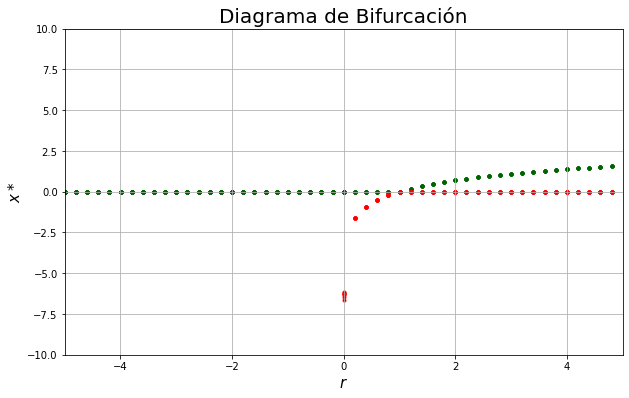

In [14]:
ti=0; tf=100; dt=100
tspam=[ti, tf]
b=0
plt.figure(figsize=(10,6))
for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solver(f4,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='darkgreen', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solver(f4,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')


plt.axis([-5, 5, -10, 10])
plt.grid()
plt.xlabel("$r$",fontsize=15)
plt.ylabel("$x*$",fontsize=15)
plt.title("Diagrama de Bifurcación",fontsize=20)
plt.show()

# **3.4 PITCHFORK BIFURCATION**


## 3.4.2
### \begin{equation}
\dot { x } = rx-senh(x)
\end{equation}



<ipython-input-19-e0a4c9886b78>:2: RuntimeWarning: overflow encountered in sinh
  return r*x - np.sinh(x)
<ipython-input-19-e0a4c9886b78>:2: RuntimeWarning: invalid value encountered in subtract
  return r*x - np.sinh(x)


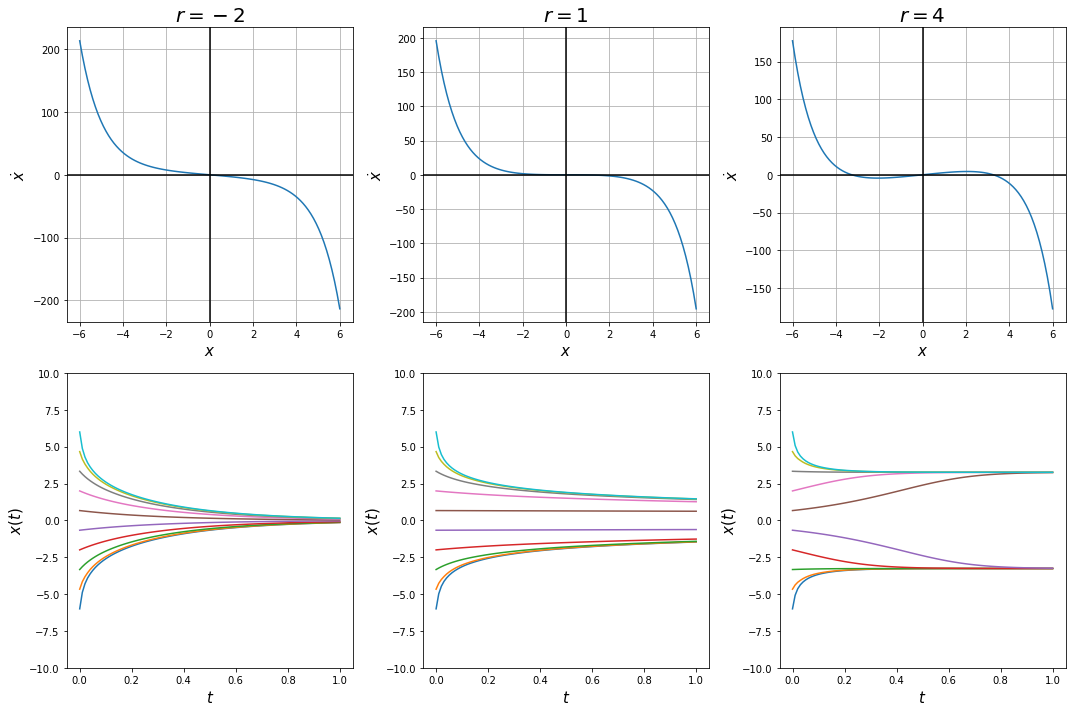

In [19]:
def f6(t,x,r,b=0):
  return r*x - np.sinh(x)

plot_vector_fields(f6,[-2,1,4],-6,6,10,0,1)

<ipython-input-19-e0a4c9886b78>:2: RuntimeWarning: overflow encountered in sinh
  return r*x - np.sinh(x)
<ipython-input-19-e0a4c9886b78>:2: RuntimeWarning: invalid value encountered in subtract
  return r*x - np.sinh(x)


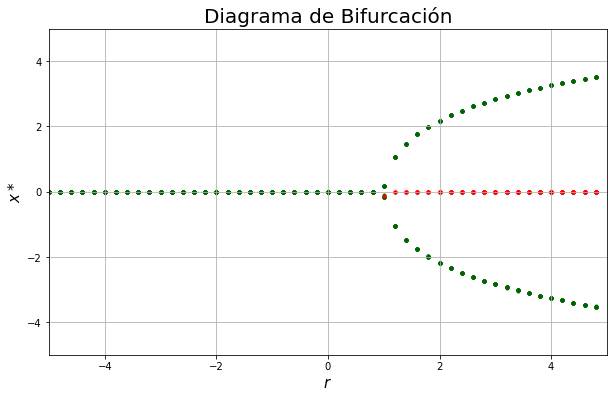

In [20]:
ti=0; tf=100; dt=100
tspam=[ti, tf]
b=0
plt.figure(figsize=(10,6))
for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solver(f6,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='darkgreen', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solver(f6,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')


plt.axis([-5, 5, -5, 5])
plt.grid()
plt.xlabel("$r$",fontsize=15)
plt.ylabel("$x*$",fontsize=15)
plt.title("Diagrama de Bifurcación",fontsize=20)
plt.show()

## 3.4.4
### \begin{equation}
\dot { x } = x + rx/(1+x^2)
\end{equation}


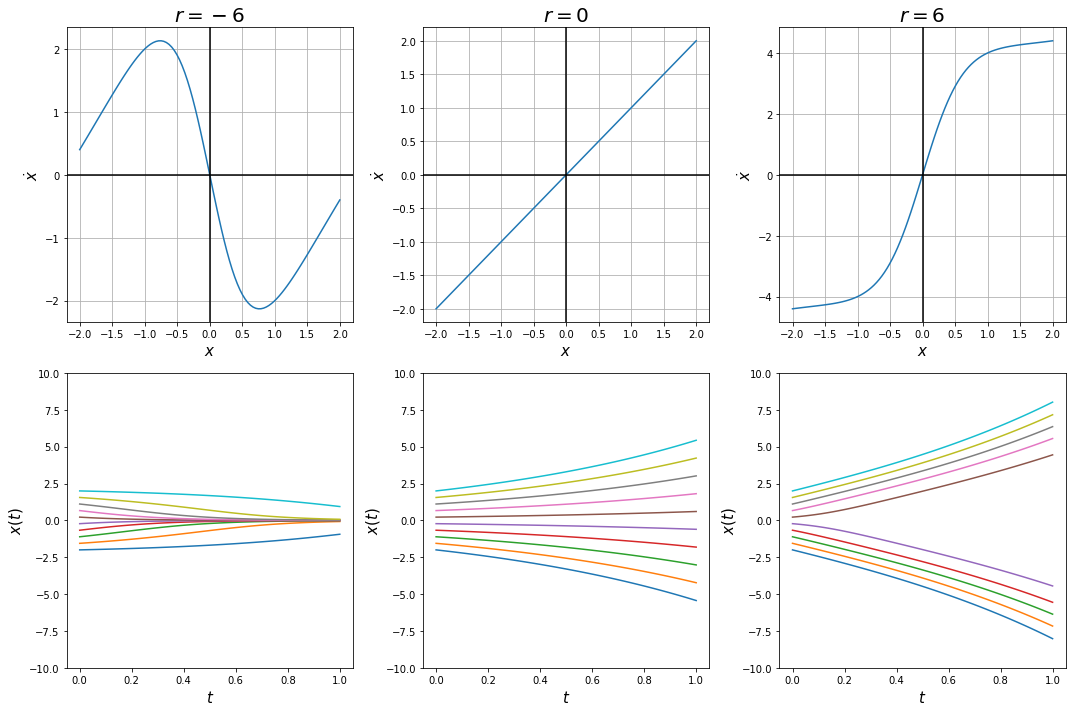

In [16]:
def f7(t,x,r,b=0):
  return x + r*x /(1+x**2)

plot_vector_fields(f7,[-6,0,6],-2,2,10,0,1)

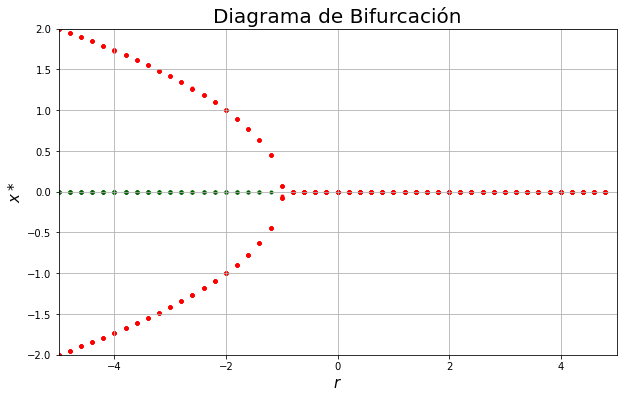

In [17]:
ti=0; tf=100; dt=100
tspam=[ti, tf]
b=0
plt.figure(figsize=(10,6))
for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solver(f7,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='darkgreen', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solver(f7,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')


plt.axis([-5, 5, -2, 2])
plt.grid()
plt.xlabel("$r$",fontsize=15)
plt.ylabel("$x*$",fontsize=15)
plt.title("Diagrama de Bifurcación",fontsize=20)
plt.show()